In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib.pyplot import figure
import json
import pickle

In [3]:
# Read the News sentiment csv file into a pandas DataFrame
w2v_df = pd.read_csv('../resources/news/business_news_word2vec.csv')
w2v_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,2016-10-14T04:00:00+0000,-0.042708,0.029647,-0.019681,0.009444,-0.030000,-0.058390,0.025602,-0.037046,0.146306,...,-0.107121,-0.026034,-0.079626,0.095634,0.015284,0.013509,0.064372,0.004792,0.014158,-0.071216
1,2017-05-15T07:21:08+0000,0.028475,0.095679,0.023912,0.081352,-0.035714,-0.142033,-0.019288,-0.052985,0.143840,...,-0.146977,0.012309,-0.083553,-0.017334,0.005087,0.021395,-0.095197,0.040135,0.063836,-0.102547
2,2017-08-28T16:33:11+0000,-0.002913,0.007083,-0.019647,0.050519,-0.048486,-0.015724,0.035422,-0.023903,0.077841,...,0.015891,0.018854,-0.063055,-0.010825,-0.048286,-0.086072,0.034598,-0.077390,0.039180,0.016693
3,2019-01-01T10:00:06+0000,-0.020165,0.114699,-0.038919,0.149319,-0.029073,-0.021098,-0.019813,-0.087023,0.072137,...,-0.100715,0.069874,-0.060326,0.026296,0.004639,0.040070,0.069238,0.006884,0.066581,-0.048204
4,2019-01-01T10:00:07+0000,0.062875,0.052707,-0.067801,0.108041,-0.057408,-0.058799,0.003148,-0.099071,0.143119,...,-0.027152,0.045913,-0.095576,0.008519,0.088440,-0.048104,-0.020682,-0.091771,-0.010306,0.050415


In [4]:
# Clean the word to vec dataframe
clean_w2v_df = w2v_df.set_index('Unnamed: 0')
clean_w2v_df.index = pd.to_datetime(clean_w2v_df.index)
clean_w2v_df.index = clean_w2v_df.index.strftime('%Y-%m-%d')
clean_w2v_df.index.names = ['date']
clean_w2v_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
date,,,,,,,,,,,,,,,,,,,,,
2016-10-14,-0.042708,0.029647,-0.019681,0.009444,-0.030000,-0.058390,0.025602,-0.037046,0.146306,0.091940,...,-0.107121,-0.026034,-0.079626,0.095634,0.015284,0.013509,0.064372,0.004792,0.014158,-0.071216
2017-05-15,0.028475,0.095679,0.023912,0.081352,-0.035714,-0.142033,-0.019288,-0.052985,0.143840,0.017806,...,-0.146977,0.012309,-0.083553,-0.017334,0.005087,0.021395,-0.095197,0.040135,0.063836,-0.102547
2017-08-28,-0.002913,0.007083,-0.019647,0.050519,-0.048486,-0.015724,0.035422,-0.023903,0.077841,0.049966,...,0.015891,0.018854,-0.063055,-0.010825,-0.048286,-0.086072,0.034598,-0.077390,0.039180,0.016693
2019-01-01,-0.020165,0.114699,-0.038919,0.149319,-0.029073,-0.021098,-0.019813,-0.087023,0.072137,0.042570,...,-0.100715,0.069874,-0.060326,0.026296,0.004639,0.040070,0.069238,0.006884,0.066581,-0.048204
2019-01-01,0.062875,0.052707,-0.067801,0.108041,-0.057408,-0.058799,0.003148,-0.099071,0.143119,0.078700,...,-0.027152,0.045913,-0.095576,0.008519,0.088440,-0.048104,-0.020682,-0.091771,-0.010306,0.050415


In [5]:
# Read the VIX history csv file into a pandas DataFrame
vix_df = pd.read_csv('../resources/vix/vix_history.csv')
vix_df.head()

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,1/2/2004,17.96,18.68,17.54,18.22
1,1/5/2004,18.45,18.49,17.44,17.49
2,1/6/2004,17.66,17.67,16.19,16.73
3,1/7/2004,16.72,16.75,15.50,15.50
4,1/8/2004,15.42,15.68,15.32,15.61


In [6]:
# Create a new dataframe with only the columns needed for the Regression
clean_vix_df = vix_df.drop(['VIX Open','VIX High','VIX Low'], axis=1).set_index('Date')
clean_vix_df.index.names = ['date']
clean_vix_df.rename(columns={'VIX Close': 'vix_close'}, inplace=True)
clean_vix_df.index = pd.to_datetime(clean_vix_df.index, format="%m/%d/%Y")
clean_vix_df.head()

,vix_close
date,
2004-01-02,18.22
2004-01-05,17.49
2004-01-06,16.73
2004-01-07,15.50
2004-01-08,15.61


In [7]:
clean_vix_df = clean_vix_df.pct_change()*100
clean_vix_df.head()

,vix_close
date,
2004-01-02,NaN
2004-01-05,-4.006586
2004-01-06,-4.345340
2004-01-07,-7.352062
2004-01-08,0.709677


In [8]:
# Merge the word to vec and VIX data
merged_w2v_df=pd.merge(clean_w2v_df,clean_vix_df, how='inner', left_index=True, right_index=True)
merged_w2v_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,vix_close
date,,,,,,,,,,,,,,,,,,,,,
2016-10-14,-0.042708,0.029647,-0.019681,0.009444,-0.030000,-0.058390,0.025602,-0.037046,0.146306,0.091940,...,-0.026034,-0.079626,0.095634,0.015284,0.013509,0.064372,0.004792,0.014158,-0.071216,-3.415219
2017-05-15,0.028475,0.095679,0.023912,0.081352,-0.035714,-0.142033,-0.019288,-0.052985,0.143840,0.017806,...,0.012309,-0.083553,-0.017334,0.005087,0.021395,-0.095197,0.040135,0.063836,-0.102547,0.192308
2017-08-28,-0.002913,0.007083,-0.019647,0.050519,-0.048486,-0.015724,0.035422,-0.023903,0.077841,0.049966,...,0.018854,-0.063055,-0.010825,-0.048286,-0.086072,0.034598,-0.077390,0.039180,0.016693,0.354610
2019-01-02,0.144113,0.129674,-0.027830,0.098580,-0.037144,-0.040632,0.109305,-0.168248,0.135254,0.042855,...,-0.118478,-0.038942,-0.057478,0.082912,-0.200335,-0.007311,-0.116525,-0.052213,-0.024972,-8.654603
2019-01-02,0.123807,-0.056305,-0.058940,-0.003916,-0.006215,0.061412,0.016164,-0.072978,0.083811,-0.072276,...,-0.058980,-0.201864,-0.059863,-0.046560,-0.038462,-0.026983,-0.155291,0.030624,0.104411,-8.654603


In [9]:
# Drop rows with NaNs
merged_w2v_df.dropna(inplace=True)
merged_w2v_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,vix_close
date,,,,,,,,,,,,,,,,,,,,,
2016-10-14,-0.042708,0.029647,-0.019681,0.009444,-0.030000,-0.058390,0.025602,-0.037046,0.146306,0.091940,...,-0.026034,-0.079626,0.095634,0.015284,0.013509,0.064372,0.004792,0.014158,-0.071216,-3.415219
2017-05-15,0.028475,0.095679,0.023912,0.081352,-0.035714,-0.142033,-0.019288,-0.052985,0.143840,0.017806,...,0.012309,-0.083553,-0.017334,0.005087,0.021395,-0.095197,0.040135,0.063836,-0.102547,0.192308
2017-08-28,-0.002913,0.007083,-0.019647,0.050519,-0.048486,-0.015724,0.035422,-0.023903,0.077841,0.049966,...,0.018854,-0.063055,-0.010825,-0.048286,-0.086072,0.034598,-0.077390,0.039180,0.016693,0.354610
2019-01-02,0.144113,0.129674,-0.027830,0.098580,-0.037144,-0.040632,0.109305,-0.168248,0.135254,0.042855,...,-0.118478,-0.038942,-0.057478,0.082912,-0.200335,-0.007311,-0.116525,-0.052213,-0.024972,-8.654603
2019-01-02,0.123807,-0.056305,-0.058940,-0.003916,-0.006215,0.061412,0.016164,-0.072978,0.083811,-0.072276,...,-0.058980,-0.201864,-0.059863,-0.046560,-0.038462,-0.026983,-0.155291,0.030624,0.104411,-8.654603


In [31]:
# Export the data
# merged_w2v_df.to_csv("../resources/vix/w2vec.csv")

In [13]:
# Assign the data to X and y
x_columns = merged_w2v_df.columns.tolist()
del x_columns[-1]

X = merged_w2v_df[x_columns]
y = merged_w2v_df["vix_close"].values.reshape(-1, 1)
print(X.shape, y.shape)

print("Shape: ", X.shape, y.shape)

(989, 300) (989, 1)
Shape:  (989, 300) (989, 1)


In [14]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [15]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(training_score)
print(testing_score)

0.4078202540635577
-0.8792690411449859


Text(0.5, 1.0, 'Residual Plot')

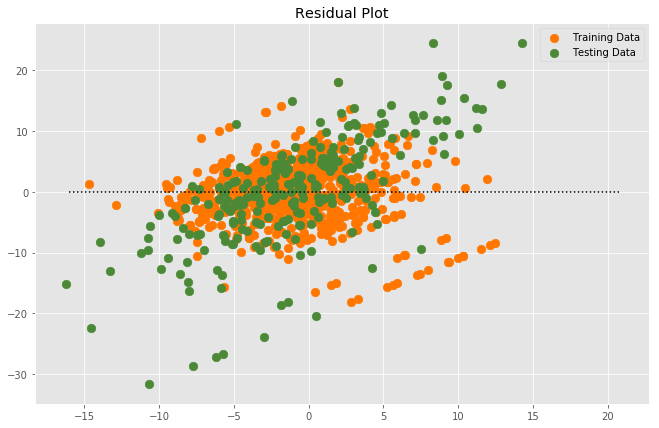

In [17]:
# Plot the Residuals for the Training and Testing data
plt.style.use('ggplot')
figure(num=None, figsize=(11, 7))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="#FF7700", label="Training Data", marker='o',s=75)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="#4B8937", label="Testing Data", marker='o',s=75)
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max(), colors="black",linestyles="dotted")
plt.title("Residual Plot")

In [18]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[-10.28924834   1.05731077  14.15290411   0.63126791  -6.8489654
   -1.58252694  20.36102068   7.53508818  -9.11097727  -1.99227223
   -2.40193865 -11.12497143  22.21725393   8.51803122 -24.41971892
    9.50075993  -0.74085859  12.80918802   2.07530308   6.24939553
    3.5026722    1.52775592   1.72313174  -1.97047544 -10.13802817
   -7.50981085   5.66234933  -0.21926543  15.62514119   5.65420642
    4.21355953  -2.53068505  -2.52019651   3.07661678   9.84708254
   10.32230259  -2.75814085   4.2274342  -11.13481502  10.21356202
  -12.86353571  12.81221512  11.70370834  -0.9298389   -7.26734784
    7.59481912  -7.56893315 -14.70001347   3.82013248  14.26862663
   -6.29111247  11.8802788   -5.29154426  -2.76556546  -9.89993169
   -6.34145892 -13.38780703  -6.60395475  -3.44805005  -8.54902514
  -16.45689401   5.60767677  -5.63972989   1.72552985  -7.06805403
   -7.11454151   3.7857044   -1.36633554   1.2527738    3.8900735
    1.00807831   3.35084322  13.03324911 -

In [19]:
# Evaluate results
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [-3.41521869]
Predicted output: [-2.68789057]
Prediction Error: [0.72732812]


In [29]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, model.predict(X_test))

76.2682575571261

In [30]:
r2_score(y_test, model.predict(X_test))

-0.8792690411449859

In [20]:
# Get min and max values
x_min = X.min()
x_max = X.max()
y_min_actual = y.min()
y_max_actual = y.max()
y_min = 101.896225057 + 12.44002424 * x_min
y_max = 101.896225057 + 12.44002424 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")

Actual Min Value: -15.992141453831044
Calculated Min Value: 0      100.035081
1      100.679228
2       99.824001
3      100.671266
4       99.808208
5       99.551355
6      100.091799
7       99.075555
8      101.183262
9      100.683419
10      99.275909
11      98.636388
12      98.988187
13     100.078349
14      98.594721
15     100.915237
16     100.249989
17     101.162087
18     100.439462
19      99.098174
20     100.188071
21     100.100193
22     100.166664
23      99.502978
24      99.904637
25      99.598667
26      99.314856
27     100.102640
28     100.219054
29      99.222285
          ...    
270     99.910244
271    100.852065
272    100.439240
273     99.173451
274    100.125334
275     99.490504
276     99.073917
277     99.312074
278     98.043644
279     99.756071
280     99.253175
281     99.757969
282     99.906856
283    100.398725
284    100.234706
285     99.530122
286     98.687007
287    100.538635
288    100.546797
289    100.097493
290     98.865344
291 

In [24]:
# Try to make on a new prediction
sample_data = merged_w2v_df.iloc[3].tolist()
del sample_data[-1]
new_value = np.array([sample_data])
y_pred = model.predict(new_value)
print(y_pred)

[[1.14466474]]


In [25]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [26]:
# Save the mode
filename = '../resources/ml_model/lr_model_w2v.pkl'
pickle.dump(model, open(filename, 'wb'))

In [27]:
# Load model and make a prediction
model = pickle.load(open('../resources/ml_model/lr_model_w2v.pkl','rb'))
prediction = model.predict([sample_data])
print(prediction)

[[1.14466474]]


In [28]:
prediction_list = np.array(prediction).tolist()
prediction_value = round(prediction_list[0][0],2)
print(prediction_value)

1.14
